### Anomaly Detection
* What are Outliers ?
* Statistical Methods for Univariate Data
* Using Gaussian Mixture Models
* Fitting an elliptic envelope
* Isolation Forest
* Local Outlier Factor
* Using clustering method like DBSCAN

### 1. Outliers
* New data which doesn't belong to general trend (or distribution) of entire data are known as outliers.
* Data belonging to general trend are known as inliners.
* Learning models are impacted by presence of outliers.
* Anomaly detection is another use of outlier detection in which we find out unusual behaviour.
* Data which were detected outliers can be deleted from complete dataset.
* Outliers can also be marked before using them in learning methods

### 2. Statistical Methods for Univariate Data
* Using Standard Deviation Method - zscore
* Using Interquartile Range Method - IQR

##### Using Standard Deviation Method
* If univariate data follows Gaussian Distribution, we can use standard deviation to figure out where our data lies

In [1]:
import numpy as np

In [2]:
data = np.random.normal(size=1000)

* Adding More Outliers

In [3]:
data[-5:] = [3.5,3.6,4,3.56,4.2]

In [4]:
from scipy.stats import zscore

* Detecting Outliers

In [5]:
data[np.abs(zscore(data)) > 3]

array([ 3.29966237,  3.21798137, -3.16511342,  3.5       ,  3.6       ,
        4.        ,  3.56      ,  4.2       ])

##### Using Interquartile Range
* For univariate data not following Gaussian Distribution IQR is a way to detect outliers

In [6]:
from scipy.stats import iqr

In [7]:
data = np.random.normal(size=1000)

In [8]:
data[-5:]=[-2,9,11,-3,-21]

In [9]:
iqr_value = iqr(data)

In [10]:
lower_threshold = np.percentile(data,25) - iqr_value*1.5

In [11]:
upper_threshold = np.percentile(data,75) + iqr_value*1.5

In [12]:
upper_threshold

np.float64(2.6546789022977624)

In [13]:
lower_threshold

np.float64(-2.705258404323732)

In [14]:
data[np.where(data < lower_threshold)]

array([ -2.76322091,  -2.92378197,  -3.        , -21.        ])

In [15]:
data[np.where(data > upper_threshold)]

array([ 2.6650508 ,  2.71258808,  2.77143204,  2.81338512,  3.11233301,
        9.        , 11.        ])

### 3. Using Gaussian Mixture Models
* Data might contain more than one peaks in the distribution of data.
* Trying to fit such multi-model data with unimodel won't give a good fit.
* GMM allows to fit such multi-model data.
* Configuration involves number of components in data, n_components.
* covariance_type controls the shape of cluster
  - full : cluster will be modeled to eclipse in arbitrary dir
  - sperical : cluster will be spherical like kmeans
  - diag : cluster will be aligned to axis
* We will see how GMM can be used to find outliers

In [16]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
C2 = np.array([[1., -0.1], [2.7, .2]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C)]
          #.7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),np.dot(np.random.randn(n_samples, 2), C2)]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
X[-5:] = [[4,-1],[4.1,-1.1],[3.9,-1],[4.0,-1.2],[4.0,-1.3]]

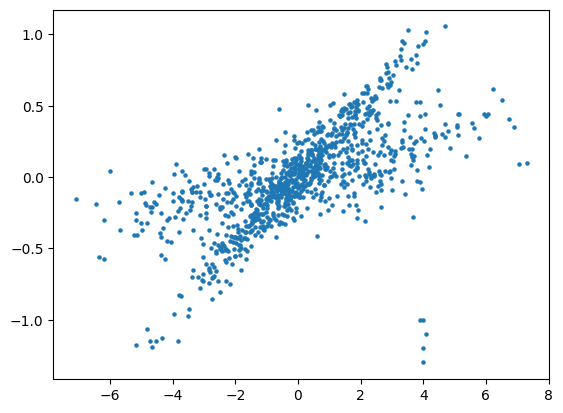

In [19]:
plt.scatter(X[:,0], X[:,1],s=5)

In [20]:
from sklearn.mixture import GaussianMixture

In [21]:
gmm = GaussianMixture(n_components=3)

In [22]:
gmm.fit(X)

GaussianMixture(n_components=3)

In [23]:
pred = gmm.predict(X)

In [24]:
pred[:50]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

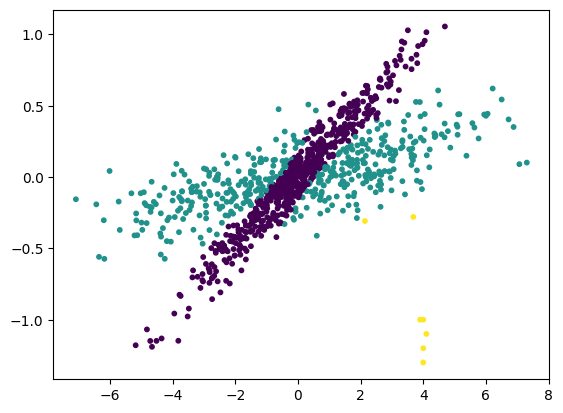

In [25]:
plt.scatter(X[:,0], X[:,1],s=10,c=pred)

### 4. Fitting Elliptical Envelope
* The assumption here is, regular data comes from known distribution ( Gaussion distribution )
* Inliner location & variance will be calculated using `Mahalanobis distances` which is less impacted by outliers.
* Calculate robust covariance fit of the data.

In [26]:
from sklearn.datasets import make_blobs
X,_ = make_blobs(n_features=2, centers=2, cluster_std=2.5, n_samples=1000)

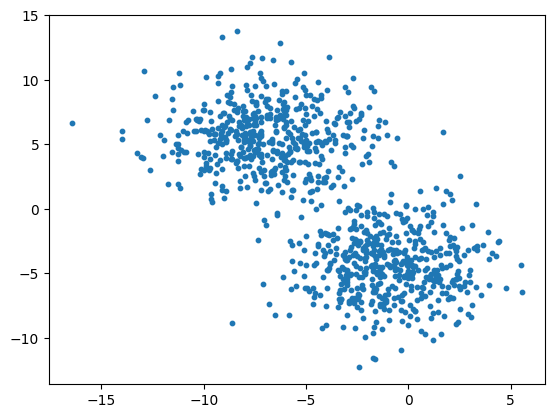

In [27]:
plt.scatter(X[:,0], X[:,1],s=10)

In [28]:
from sklearn.covariance import EllipticEnvelope

In [29]:
ev = EllipticEnvelope(contamination=.05)

In [30]:
ev.fit(X)

EllipticEnvelope(contamination=0.05)

In [31]:
cluster = ev.predict(X)

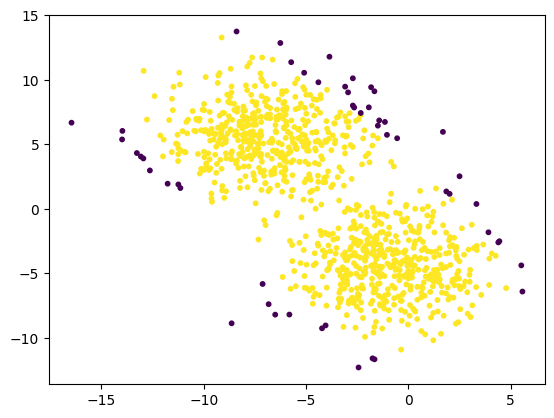

In [32]:
plt.scatter(X[:,0], X[:,1],s=10,c=cluster)

### 5. Isolation Forest
* Based on RandomForest
* Useful in detecting outliers in high dimension datasets.
* This algorithm randomly selects a feature & splits further.
* Random partitioning produces shorter part for anomolies.
* When a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [33]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [34]:
from sklearn.ensemble import IsolationForest

In [35]:
data = np.r_[X_train,X_test,X_outliers]

In [50]:
iso = IsolationForest(contamination=0.075)

In [51]:
iso.fit(data)

IsolationForest(contamination=0.075)

In [52]:
pred = iso.predict(data)

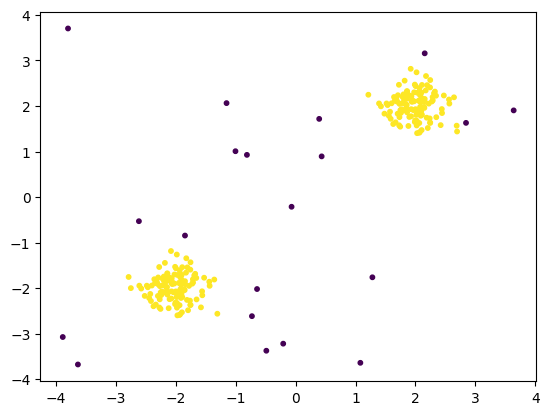

In [53]:
plt.scatter(data[:,0], data[:,1],s=10,c=pred)

### 6. Local Outlier Factor
* Based on nearest neighbours
* Suited for moderately high dimension datasets
* LOF computes a score reflecting degree of abnormility of a data.
* LOF Calculation
  - Local density is calculated from k-nearest neighbors.
  - LOF of each data is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density.
  - An abnormal data is expected to have smaller local density.
* LOF tells you not only how outlier the data is but how outlier is it with respect to all data

In [54]:
from sklearn.neighbors import LocalOutlierFactor

In [60]:
lof = LocalOutlierFactor(n_neighbors=23,contamination=.05)

In [61]:
pred = lof.fit_predict(data)

In [62]:
s = np.abs(lof.negative_outlier_factor_)

In [63]:
s

array([ 1.00472998,  1.14013326,  0.98440291,  1.26748319,  0.96863543,
        0.98603595,  1.1748119 ,  1.22373832,  1.00692338,  1.15896597,
        1.22710277,  1.05321652,  0.9544107 ,  1.01493892,  0.97190427,
        1.37962451,  1.02003127,  1.09625185,  1.18985218,  1.08325905,
        1.03985684,  0.98059668,  1.16586376,  1.04069958,  1.12900164,
        0.99005315,  0.98967568,  1.09659092,  0.99115105,  1.02005915,
        0.96809497,  1.17305942,  1.09987361,  0.99795083,  0.99806301,
        1.15043844,  1.14696951,  2.04181494,  0.97764817,  1.20397247,
        0.93701394,  1.27457846,  1.02682447,  1.06565574,  0.9748492 ,
        1.00247634,  0.98185688,  1.1121546 ,  0.989301  ,  0.97447278,
        1.12423386,  0.98175241,  0.94264944,  1.4169146 ,  0.97660199,
        1.32315483,  1.58249597,  0.93244098,  1.05028455,  1.15455917,
        1.05743968,  1.29259756,  1.38454297,  1.08501367,  0.97065612,
        1.13789303,  1.00896808,  1.2976541 ,  0.97893067,  1.09

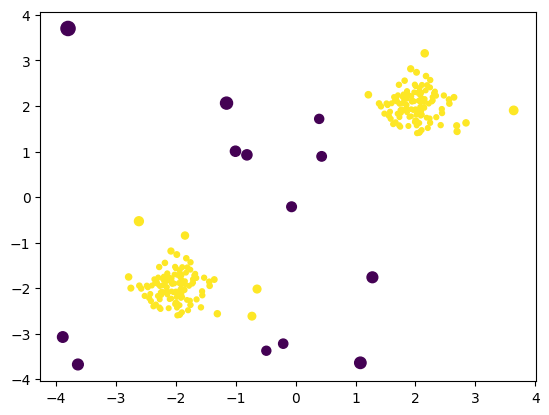

In [64]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=pred)

### 7. Outlier Detection using DBSCAN
* DBSCAN is a clustering method based on density
* Groups data which are closer to each other.
* Doesn't use distance vector calculation method
* Data not close enough to any cluster is not assigned any cluster & these can be anomalies
* eps controls the degree of considering a data part of cluster

In [65]:
from sklearn.cluster import DBSCAN

In [66]:
dbscan = DBSCAN(eps=.5)

In [67]:
dbscan.fit(data)

DBSCAN()

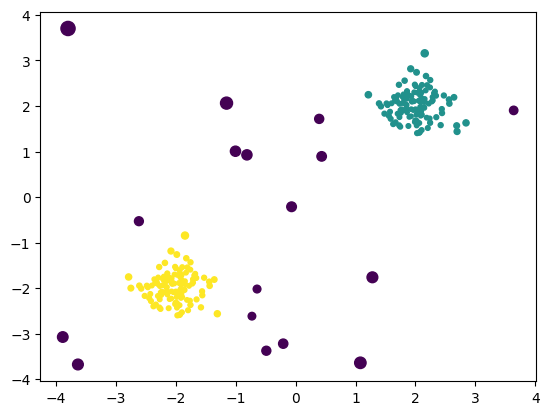

In [68]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=dbscan.labels_)